# Sentiment Analysis on Stocks Data

## Data Exploration

In [64]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Embedding,Input,LSTM,Conv1D,MaxPool1D,Bidirectional,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [65]:
#importing dataset
df = pd.read_csv("/kaggle/input/stock-sentiment/stock_sentiment.csv")

In [66]:
df.head(8)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,0
7,Monday's relative weakness. NYX WIN TIE TAP IC...,0


In [67]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [68]:
#checking for null values
df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

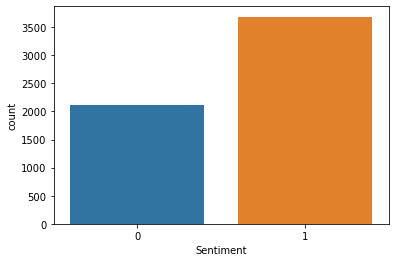

In [69]:
#countplot showing type of sentiment
sns.countplot(df.Sentiment)
plt.show()

In [70]:
#counting total null values in Sentiment column of data
df.Sentiment.nunique()

2

# Data Cleaning

In [71]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
# function to clean punctuations from data
def remove_punc(message):
    punc_removed = [word    for word in message if word not in string.punctuation]
    punc_join = ''.join(punc_removed)
    return punc_join

In [73]:
# applying above function to the text
df["Cleaned text"] = df.Text.apply(remove_punc)

In [74]:
df.head()


,Text,Sentiment,Cleaned text
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137


In [75]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [76]:
# cleaning data which contains stop words
stop_words = stopwords.words("english")
stop_words.extend(["from","subject","re","edu","use","will","day","user","today","stock","week","year","aap","https","com"])

In [77]:
#function to process text data
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token)>=3:
            result.append(token)
    
    return result

In [78]:
df["Cleaned text"] = df["Cleaned text"].apply(preprocess)

In [79]:
df["Cleaned text joined"] = df["Cleaned text"].apply(lambda x: " ".join(x))

In [80]:
df.head()

,Text,Sentiment,Cleaned text,Cleaned text joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,[mnta],mnta
4,OI Over 21.37,1,[],


## Data Visualization

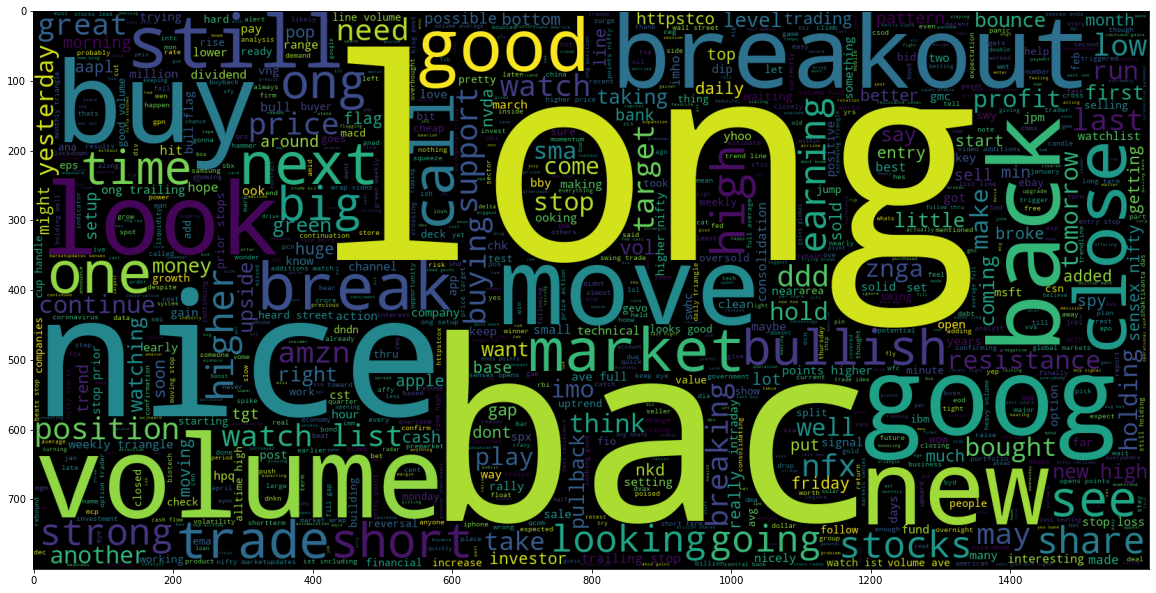

In [81]:
#positive sentiment wordcloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, width=1600, height=800).generate(" ".join(df[df["Sentiment"]==1]["Cleaned text joined"]))
plt.imshow(wc)
plt.show()

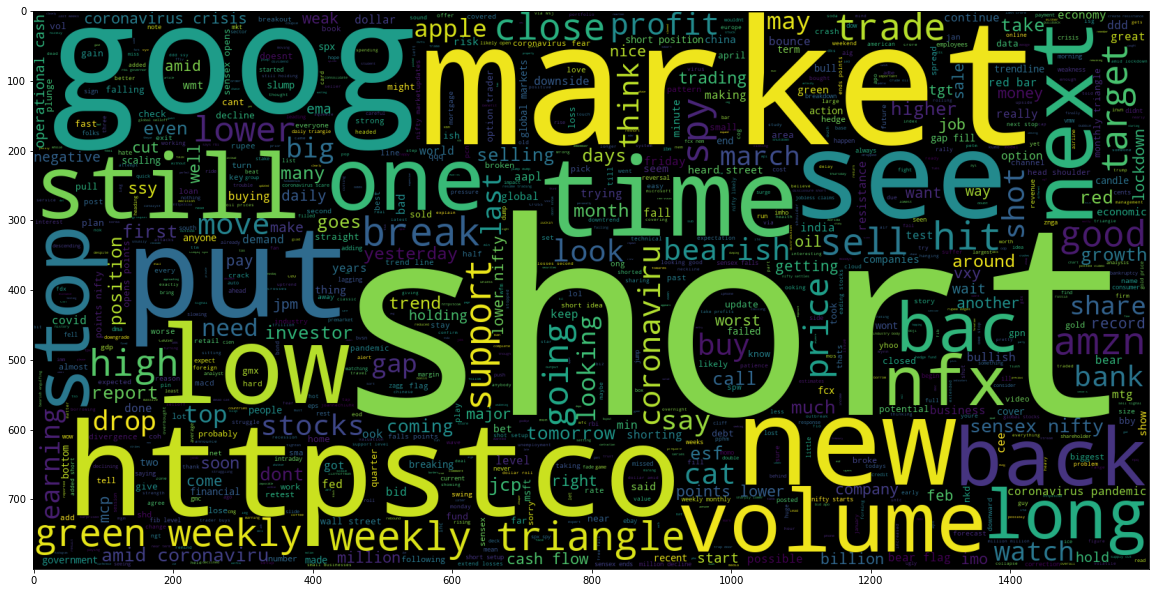

In [82]:
# negative sentiment wordcloud
plt.figure(figsize=(20,20))
wc2  = WordCloud(max_words=1000,width=1600, height=800).generate(" ".join(df[df["Sentiment"]==0]["Cleaned text joined"]))
plt.imshow(wc2)
plt.show()

In [83]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
maxlen= -1

for doc in df["Cleaned text joined"]:
    tokens = nltk.word_tokenize(doc)
    if maxlen< len(tokens):
        maxlen = len(tokens)
        
print("Max number of words in any Doc:",maxlen)

Max number of words in any Doc: 20


In [85]:
tweets_len = [len(nltk.word_tokenize(x))       for x in df["Cleaned text joined"]]
tweets_len[:7]

[14, 6, 7, 1, 0, 1, 8]

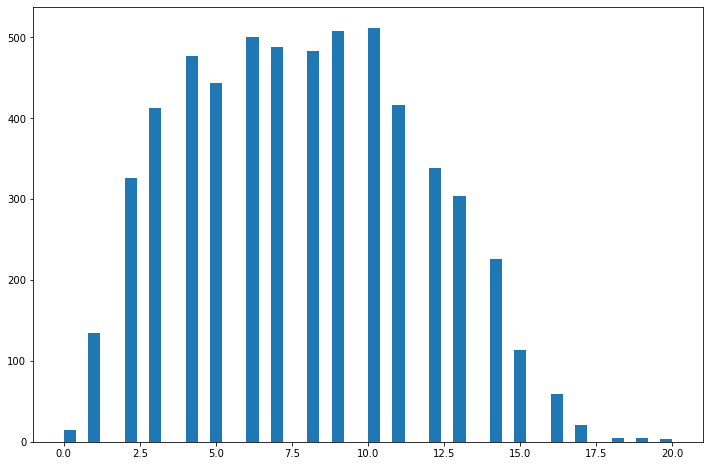

In [86]:
plt.figure(figsize=(12,8))
plt.hist(x=tweets_len, bins=50)
plt.show()

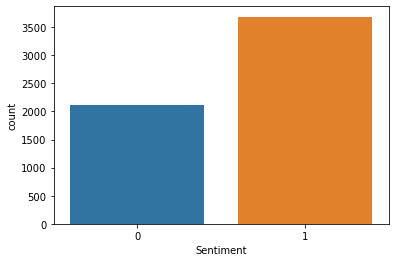

In [87]:
sns.countplot(df["Sentiment"], data=df)
plt.show()

In [88]:
list_of_words = []

for i in df["Cleaned text"]:
    for j in i:
        list_of_words.append(j)

In [89]:
total_words = len(list(set(list_of_words)))
total_words

9267

## Data Modelling

In [90]:
x = df["Cleaned text"]
y = df["Sentiment"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=24)

In [91]:
print(X_train.shape)
print(X_test.shape)

(5211,)
(580,)


In [92]:
#tokenizing text data
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

#training sequence
train_sequences = tokenizer.texts_to_sequences(X_train)

#testing sequences
test_sequences = tokenizer.texts_to_sequences(X_test)

In [93]:
# Adding padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen=29)
padded_test = pad_sequences(test_sequences, maxlen=29)


In [94]:
for i, doc in enumerate(padded_train[:3]):
    print("Padded encoding for the document:",i+1,"is ",doc)

Padded encoding for the document: 1 is  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 1291 3632    1
  559]
Padded encoding for the document: 2 is  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   54 3633 3634  368 1512 1908 3635
 3636]
Padded encoding for the document: 3 is  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0   37   28   22 2476   21
   49]


In [95]:
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [96]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(5211, 2)
(580, 2)


## LSTM Model

In [97]:
model = Sequential()
model.add(Embedding(total_words, output_dim= 512))

model.add(LSTM(256))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))
model.add(Dense(2,activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 512)         4744704   
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 5,565,314
Trainable params: 5,565,314
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.fit(padded_train, y_train_cat, batch_size=32, validation_split=0.2, epochs=3)

Epoch 1/3
131/131 [==============================] - 23s 157ms/step - loss: 0.6277 - acc: 0.6525 - val_loss: 0.4949 - val_acc: 0.7584
Epoch 2/3
131/131 [==============================] - 20s 153ms/step - loss: 0.2760 - acc: 0.8863 - val_loss: 0.5425 - val_acc: 0.7459
Epoch 3/3
131/131 [==============================] - 20s 153ms/step - loss: 0.1164 - acc: 0.9576 - val_loss: 0.7164 - val_acc: 0.7488


In [99]:
y_pred = model.predict(padded_test)

In [100]:
y_pred

array([[7.32253909e-01, 2.67746061e-01],
       [7.36899853e-01, 2.63100147e-01],
       [3.87242384e-04, 9.99612749e-01],
       ...,
       [3.01305001e-04, 9.99698758e-01],
       [7.94472337e-01, 2.05527663e-01],
       [8.87542665e-01, 1.12457246e-01]], dtype=float32)

In [101]:
prediction = []

for i in y_pred:
    prediction.append(np.argmax(i))

In [102]:
original = []

for i in y_test_cat:
    original.append(np.argmax(i))

In [103]:
## Accuracy

## Accuracy

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
report = classification_report(original,prediction)
print(report)

print("Accuracy of LSTM model: 75%")

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       195
           1       0.85      0.81      0.83       385

    accuracy                           0.78       580
   macro avg       0.75      0.76      0.76       580
weighted avg       0.78      0.78      0.78       580

Accuracy of LSTM model: 75%


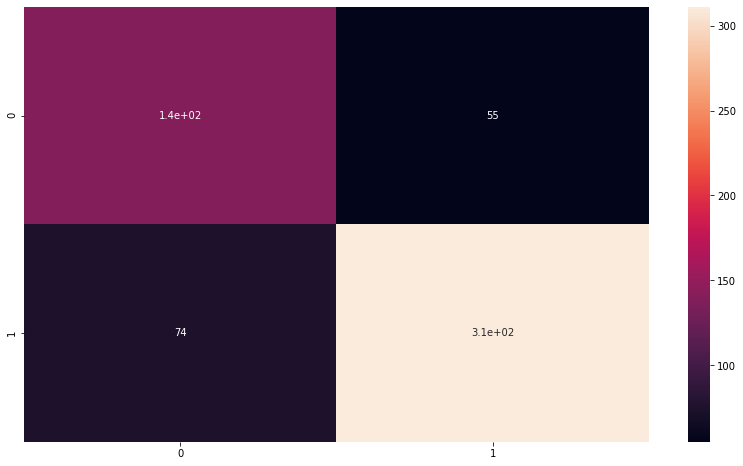

In [105]:
plt.figure(figsize=(14,8))
cm = confusion_matrix(original,prediction)
sns.heatmap(data = cm, annot=True)
plt.show()

* Author: Purvit Vashishtha
* Working Environment: Kaggle Notebook
* Submitted on: 20 Feb 5:05:45 pm